## Preprocessing Dataset

In [1]:
# Imports 
# open folder
from os import makedirs
from os import listdir
import os
from shutil import copyfile

# open image
import cv2
from PIL import Image

# random 
from random import seed
from random import random

# basic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# image augmentation
import albumentations as A

In [2]:
import os
import shutil
from random import shuffle

# Define the paths
original_dataset_path = r'C:\Users\HP\Desktop\Data\poultry_new\poultry_data'
train_path = r'C:\Users\HP\Desktop\Data\poultry_new\Train'
validation_path = r'C:\Users\HP\Desktop\Data\poultry_new\Validate'
test_path = r'C:\Users\HP\Desktop\Data\poultry_new\Test'

# Create directories if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(validation_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Define the split ratios
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Function to split the dataset
def split_dataset(source, train, validation, test, ratio):
    files = os.listdir(source)
    shuffle(files)

    # Calculate the split indices
    train_split = int(len(files) * ratio[0])
    validation_split = int(len(files) * (ratio[0] + ratio[1]))

    # Copy files to respective directories
    for file in files[:train_split]:
        shutil.copy(os.path.join(source, file), os.path.join(train, file))

    for file in files[train_split:validation_split]:
        shutil.copy(os.path.join(source, file), os.path.join(validation, file))

    for file in files[validation_split:]:
        shutil.copy(os.path.join(source, file), os.path.join(test, file))

# Split each class folder
classes = ['Coccidiosis', 'Salmonella', 'Newcastle diseases', 'Healthy poultry']

for class_name in classes:
    class_source = os.path.join(original_dataset_path, class_name)
    class_train = os.path.join(train_path, class_name)
    class_validation = os.path.join(validation_path, class_name)
    class_test = os.path.join(test_path, class_name)

    os.makedirs(class_train, exist_ok=True)
    os.makedirs(class_validation, exist_ok=True)
    os.makedirs(class_test, exist_ok=True)

    split_dataset(class_source, class_train, class_validation, class_test, [train_ratio, validation_ratio, test_ratio])

print("Dataset splitting is complete.")


Dataset splitting is complete.


In [3]:
# Separate block for displaying the number of files in each class for training
print("\nNumber of files in each class for the training set:")
for class_name in classes:
    class_train = os.path.join(train_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_train))} files")


Number of files in each class for the training set:
Coccidiosis: 1682 files
Salmonella: 1820 files
Newcastle diseases: 300 files
Healthy poultry: 1645 files


In [4]:
# Separate block for displaying the number of files in each class for validation
print("\nNumber of files in each class for the validation set:")
for class_name in classes:
    class_validation = os.path.join(validation_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_validation))} files")



Number of files in each class for the validation set:
Coccidiosis: 210 files
Salmonella: 228 files
Newcastle diseases: 38 files
Healthy poultry: 206 files


In [5]:
# Separate block for displaying the number of files in each class for test
print("\nNumber of files in each class for the test set:")
for class_name in classes:
    class_test = os.path.join(test_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_test))} files")


Number of files in each class for the test set:
Coccidiosis: 211 files
Salmonella: 228 files
Newcastle diseases: 38 files
Healthy poultry: 206 files


In [6]:
# Separate block for displaying the number of files in each class for the original dataset
print("\nNumber of files in each class for the original dataset:")
for class_name in classes:
    class_original = os.path.join(original_dataset_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_original))} files")



Number of files in each class for the original dataset:
Coccidiosis: 2103 files
Salmonella: 2276 files
Newcastle diseases: 376 files
Healthy poultry: 2057 files


## Image Augmentation

In [7]:
# image augmentation flip horizontal(mirror) image 
transform_flip = A.Compose([A.HorizontalFlip(always_apply=True)])

In [8]:
# image augmentation rotation image 45 degree angle, rescale 10% and shift 0.062%
transform_shift = A.Compose([A.ShiftScaleRotate(shift_limit=(0.0625, 0.0625), 
                                                scale_limit=(0.1, 0.1), 
                                                rotate_limit=(45, 45),
                                                p=1.0)])

In [9]:
# image augmentation add gaussian noise and decrease brightness
transform_noise = A.Compose([A.GaussNoise(var_limit=(100,200),
                                         mean=-30,
                                         p=1.0)])

In [10]:
transform_rotate = A.Compose([A.Rotate(limit=45, p=1.0)])

In [11]:
transform_zoom = A.Compose([A.ShiftScaleRotate(scale_limit=(0.5, 2), p=1.0)])

In [12]:
transform_skew = A.Compose([A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, p=1.0)])

In [15]:
# open sample image data
image = cv2.imread(r"C:\Users\HP\Desktop\Data\poultry_new\Train\Coccidiosis\cocci.57.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to pixel numpy array

In [16]:
# transform filp and shift
transformed_flip = transform_flip(image=image)['image']
transformed_shift = transform_shift(image=image)['image']
transformed_noise = transform_noise(image=image)['image']
transformed_zoom = transform_zoom(image=image)['image']
transformed_skew = transform_skew(image=image)['image']

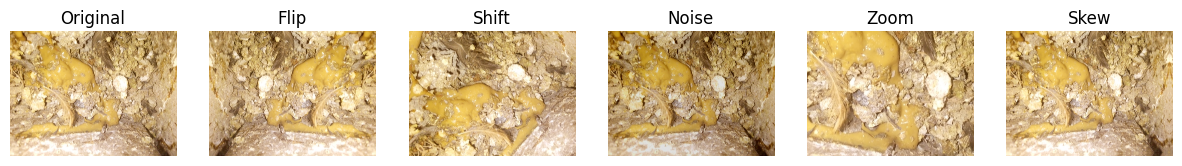

In [20]:
import matplotlib.pyplot as plt

# Assuming you have the following images: image, transformed_flip, transformed_shift, transformed_noise, transformed_zoom, transformed_skew

# Set the figure size for all images
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

# Display the original image
axes[0].imshow(image)
axes[0].set_title("Original", size=12)
axes[0].axis("off")

# Display the transformed images
images = [transformed_flip, transformed_shift, transformed_noise, transformed_zoom, transformed_skew]
titles = ["Flip", "Shift", "Noise", "Zoom", "Skew"]

for i, (img, title) in enumerate(zip(images, titles), start=1):
    axes[i].imshow(img)
    axes[i].set_title(title, size=12)
    axes[i].axis("off")

plt.show()

In [22]:
import cv2
from os import listdir
import os

src_directory = r"C:\Users\HP\Desktop\Data\poultry_new\Train\Newcastle diseases"

# Loop through each file in the directory
for file in sorted(listdir(src_directory)):
    try:
        # Construct the full file path using os.path.join
        file_path = os.path.join(src_directory, file)

        # Read the image
        image = cv2.imread(file_path)
        
        if image is None:
            raise Exception(f"Error: Unable to read image file '{file}'")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply transformations
        transformed_flip = transform_flip(image=image)['image']
        transformed_shift = transform_shift(image=image)['image']
        transformed_noise = transform_noise(image=image)['image']
        
        # Save augmented images with different filenames
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_flip.jpg"), cv2.cvtColor(transformed_flip, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_shift.jpg"), cv2.cvtColor(transformed_shift, cv2.COLOR_RGB2BGR))
        cv2.imwrite(os.path.join(src_directory, file[:-4] + "_noise.jpg"), cv2.cvtColor(transformed_noise, cv2.COLOR_RGB2BGR))
    
    except Exception as e:
        print(f"Error processing file '{file}': {e}")


In [23]:
# Separate block for displaying the number of files in each class for training
print("\nNumber of files in each class for the training set:")
for class_name in classes:
    class_train = os.path.join(train_path, class_name)
    print(f"{class_name}: {len(os.listdir(class_train))} files")


Number of files in each class for the training set:
Coccidiosis: 1682 files
Salmonella: 1820 files
Newcastle diseases: 1200 files
Healthy poultry: 1645 files


## Convolutional Neural Network

In [24]:
# Import librarys
# normal 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# open file
from IPython.display import Image
import os
import PIL

# model CNN (Deep learning network)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,\
GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
# Create function plot loss function and accuracy score graph
def plot_graph(model_values):
    ''' 
    Input : Model_values of keras.callbacks.History
    Return : Graph of Loss function and accuracy score between training dataset and vaildation dataset
    '''
    # Subplots
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(model_values.history['loss'], label='Training Loss');
    plt.plot(model_values.history['val_loss'], label='Testing Loss');
    plt.legend(fontsize=12, loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss');
    
    # Plot MSE
    plt.subplot(1, 2, 2)
    
    plt.plot(model_values.history['accuracy'], label='Training Accuracy')
    plt.plot(model_values.history['val_accuracy'], label='Validation Accuracy')
    
    plt.legend(fontsize=12, loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy');

## First, check GPU

In [26]:
# https://www.tensorflow.org/guide/keras/sequential_model
# Due to we use Keras Sequential API, 
# We want to check GPU first before training our model for 
# impore efficiency and reduce time. 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9280283387084340568
xla_global_id: -1
]


In [27]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths
original_dataset_path = r'C:\Users\HP\Desktop\Data\poultry_new\poultry_data'
train_path = r'C:\Users\HP\Desktop\Data\poultry_new\Train'
validation_path = r'C:\Users\HP\Desktop\Data\poultry_new\Validate'
test_path = r'C:\Users\HP\Desktop\Data\poultry_new\Test'


In [28]:
# Set parameters for image size and batch size
img_height = 128
img_width = 128
batch_size = 50

In [29]:
# Rescale pixel values to reduce image size before using in the model
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)
data_gen_test = ImageDataGenerator(rescale=1/255.)

In [30]:
# Create training dataset
train_dataset = data_gen_train.flow_from_directory(train_path,
                                                   class_mode="categorical",
                                                   target_size=(img_height, img_width),
                                                   batch_size=batch_size)


Found 6347 images belonging to 4 classes.


In [31]:
# Create validation dataset
valid_dataset = data_gen_valid.flow_from_directory(validation_path,
                                                   class_mode="categorical",
                                                   target_size=(img_height, img_width),
                                                   batch_size=batch_size)


Found 682 images belonging to 4 classes.


In [32]:
# Create testing dataset
test_dataset = data_gen_test.flow_from_directory(test_path,
                                                 class_mode="categorical",
                                                 target_size=(img_height, img_width),
                                                 batch_size=batch_size)


Found 683 images belonging to 4 classes.


In [33]:
# Display class distribution in the training dataset
print("Classes in the training dataset:")
print(pd.Series(train_dataset.classes).value_counts(normalize=True).mul(100))
print("Class indices:", train_dataset.class_indices)

Classes in the training dataset:
3    28.674965
0    26.500709
1    25.917756
2    18.906570
Name: proportion, dtype: float64
Class indices: {'Coccidiosis': 0, 'Healthy poultry': 1, 'Newcastle diseases': 2, 'Salmonella': 3}


In [34]:
# Display class distribution in the validation dataset
print("\nClasses in the validation dataset:")
print(pd.Series(valid_dataset.classes).value_counts())


Classes in the validation dataset:
3    228
0    210
1    206
2     38
Name: count, dtype: int64


In [35]:
# Display class distribution in the testing dataset
print("\nClasses in the testing dataset:")
print(pd.Series(test_dataset.classes).value_counts())


Classes in the testing dataset:
3    228
0    211
1    206
2     38
Name: count, dtype: int64


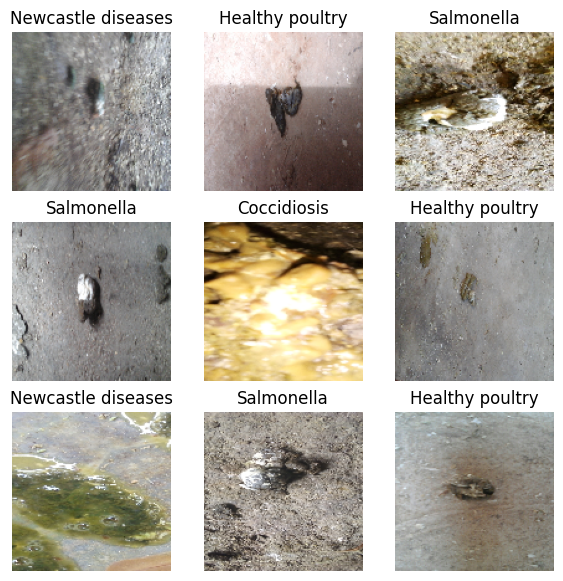

In [37]:
# show some image sample in training dataset
images, labels_class = next(train_dataset)
classes = train_dataset.class_indices
plt.figure(figsize=(7, 7))
for i in range(9):
    label = [j for j in classes if classes[j] == np.argmax(labels_class[i])][0]
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((images[i]*255.).astype("uint8"))
    plt.title(label)
    plt.axis("off")

In [38]:
# Recheck after rescale
print(images[0].max())
print(images[0].min())

1.0
0.14901961


## CNN Model Training

In [39]:
# Training model
# Compile the model
model = Sequential()

# Input layer
model.add(Conv2D(16,(3,3), activation='relu',
                 kernel_initializer='he_uniform', 
                 padding='same', input_shape=(128,128,3))) # filter image by dot product in matrix to find the object in picture
# Hidden layers
model.add(MaxPooling2D(pool_size=(2,2))) # reduce stucture of image even if object slightly move but the result is same  
model.add(Conv2D(32,(3,3), activation='relu',
                 kernel_initializer='he_uniform', 
                 padding='same')) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # convert all the resultant 2-Dimensional arrays into a single long continuous linear vector
model.add(Dense(64, activation='relu',
                kernel_initializer='he_uniform'))

# avoid overfitting!
model.add(Dropout(0.5))

# Output layer
model.add(Dense(4, activation='softmax'))

# Compile the model         
model.compile(loss="categorical_crossentropy", 
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [40]:
# we have 2,102,564 nodes for training
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 64)                2

In [43]:
# Save checkpoints during training
checkpoint_path = r'C:\Users\HP\Desktop\Data\poultry_new\model\cnn\cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [44]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [45]:
# training model 
# make sure you truely save checkpoint_path
history = model.fit(train_dataset,
                              epochs=25,
                              validation_data=valid_dataset,
                              callbacks=[cp_callback])

Epoch 1/25


127/127 [==============================] - ETA: 0s - loss: 1.2271 - accuracy: 0.5377
Epoch 1: saving model to C:\Users\HP\Desktop\Data\poultry_new\model\cnn\cp.ckpt
127/127 [==============================] - 314s 2s/step - loss: 1.2271 - accuracy: 0.5377 - val_loss: 0.7201 - val_accuracy: 0.7903
Epoch 2/25
127/127 [==============================] - ETA: 0s - loss: 0.7334 - accuracy: 0.7142
Epoch 2: saving model to C:\Users\HP\Desktop\Data\poultry_new\model\cnn\cp.ckpt
127/127 [==============================] - 245s 2s/step - loss: 0.7334 - accuracy: 0.7142 - val_loss: 0.5427 - val_accuracy: 0.8167
Epoch 3/25
127/127 [==============================] - ETA: 0s - loss: 0.5772 - accuracy: 0.7957
Epoch 3: saving model to C:\Users\HP\Desktop\Data\poultry_new\model\cnn\cp.ckpt
127/127 [==============================] - 242s 2s/step - loss: 0.5772 - accuracy: 0.7957 - val_loss: 0.3927 - val_accuracy: 0.8900
Epoch 4/25
127/127 [==============================] - ETA: 0s - loss: 0.45

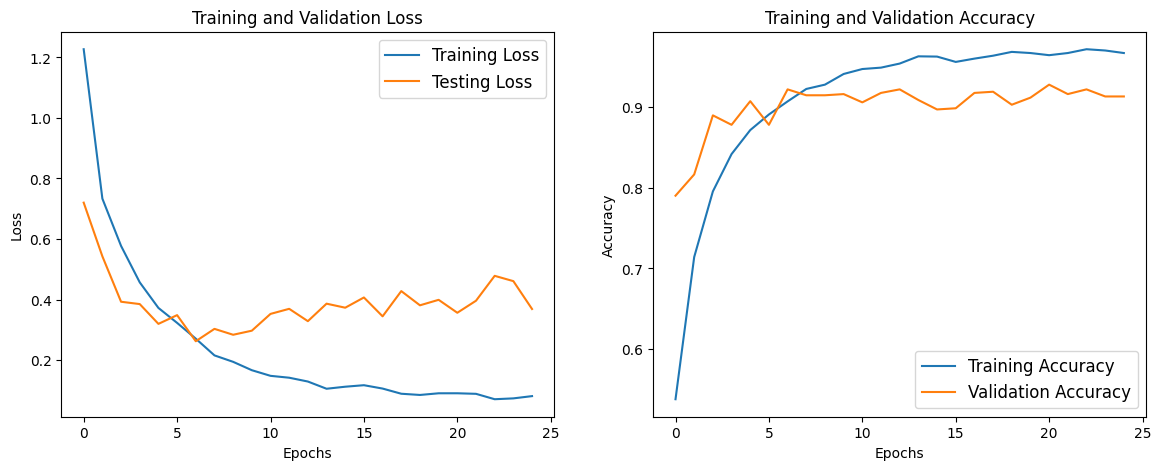

In [46]:
# plot graph 
plot_graph(history)

# Slightly overfit between training and validation 
# Final accuracy after training 25 epochs is score in training 0.94% 
# and vaildaion 0.88%
# Loss function after training 25 epochs is score in training 0.14% 
# and vaildaion 0.45%

# Good performance! but not enough ! 

In [47]:
# create dataframe to save in .csv file
hist_df = pd.DataFrame(history.history) 
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.227099,0.537734,0.720108,0.790323
1,0.733391,0.714196,0.542731,0.816716
2,0.577170,0.795651,0.392671,0.890029
3,0.456749,0.841973,0.384965,0.878299
4,0.372233,0.871750,0.319547,0.907625


In [48]:
# save model
model.save(r"C:\Users\HP\Desktop\Data\poultry_new\model\cnn_model.h5")

C:\Users\HP\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
# # save history our model to csv: 
# hist_csv_file = r"C:\Users\HP\Desktop\Data\poultry_new\model\history_cnn16.csv"
# with open(hist_csv_file, mode='w') as f:
#     hist_df.to_csv(f)

# Save history to CSV file
hist_csv_file = r"C:\Users\HP\Desktop\Data\poultry_new\model\history_cnn_model16.csv"
hist_df.to_csv(hist_csv_file, index=False)  # Set index=False to exclude the index column